### Notebook for analyzing DFO historical flood impacts

In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import squarify

In [5]:
directory_path = os.path.join("..", "data", "results", "social_flood", "events")
directory_names = [name for name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, name))]

In [6]:
# Combine into one dataframe
results = []
invalid = []
valid = []
for i in directory_names:
    event_id = i.split("_")[1] # pull DFO ID
    df = pd.read_csv(os.path.join(directory_path, i, f"DFO_{event_id}_results.csv"))
    if df.empty:
        invalid.append(event_id)
        continue
    valid.append(event_id)
    for index, row in df.iterrows():
        new_row = {
            "DFO_ID": event_id,
            "ISO3": row['ISO3'],
            "FE": row['FE'],
            "BQFE": row['BQFE'],
            "CI": row['CI'],
            "QR": row['QR']
        }
        results.append(new_row)

results_df = pd.DataFrame(results, columns=["DFO_ID", "ISO3", "FE", "BQFE", "CI", "QR"])

In [7]:
results_df

,DFO_ID,ISO3,FE,BQFE,CI,QR
0,3109,PAK,7.434246e+03,5895.244954,-0.724748,0.000000
1,3109,UZB,1.803577e+02,4.884056,-0.310482,0.000000
2,3109,TJK,1.680495e+01,0.000000,0.206438,NaN
3,3109,TKM,2.120217e+02,0.037877,0.260623,0.000000
4,3221,DZA,2.592599e+04,2508.507445,0.150469,1.278142
...,...,...,...,...,...,...
1772,4156,KHM,2.908859e+00,2.848489,-0.622440,0.000000
1773,2592,PHL,2.101542e+06,265388.946302,-0.054435,0.865582
1774,2194,MOZ,4.936570e+02,18.521308,0.202728,1.831539
1775,2194,ZWE,1.248028e+01,0.203025,0.084484,0.000000


In [8]:
results_df.to_csv("DFO_results.csv")

In [9]:
threshold = 10000
filtered_df = results_df[results_df['FE'] >= threshold]
filtered_df.to_csv(f"DFO_results_exposure-gt-{threshold}.csv")

In [10]:
filtered_df

,DFO_ID,ISO3,FE,BQFE,CI,QR
4,3221,DZA,2.592599e+04,2508.507445,0.150469,1.278142
10,3168,KHM,8.853019e+04,25184.041103,-0.182506,0.039904
11,4280,VNM,5.337280e+04,18209.643850,-0.232963,0.301983
14,4423,VNM,4.337457e+04,33045.349699,-0.733678,0.001176
16,4423,THA,6.259125e+04,33451.812268,-0.511108,0.013660
...,...,...,...,...,...,...
1767,3188,THA,2.493545e+05,108245.018212,-0.411105,0.077979
1768,3188,LAO,2.636829e+04,4155.162686,0.064155,1.138365
1769,3188,KHM,2.126121e+05,74837.967727,-0.167456,0.369483
1773,2592,PHL,2.101542e+06,265388.946302,-0.054435,0.865582


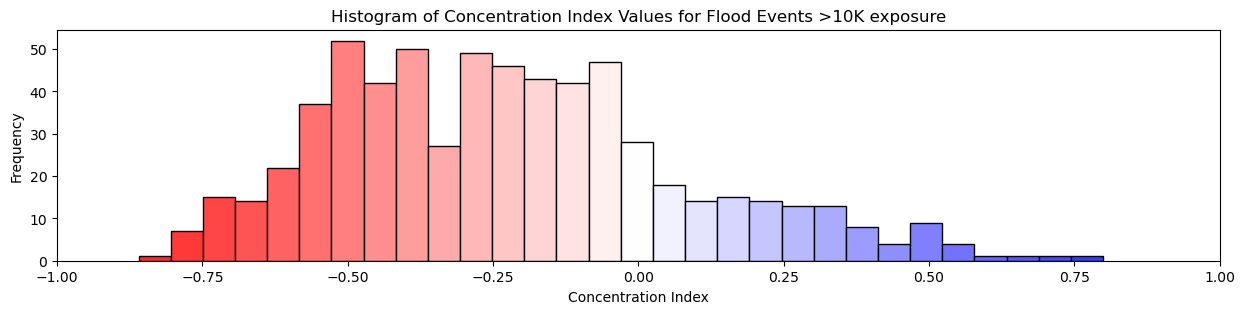

In [11]:
histogram_df = filtered_df.dropna(subset=['CI'])

fig, ax = plt.subplots(figsize=(15, 3))
counts, bins, patches = ax.hist(histogram_df['CI'], bins=30, edgecolor='k')

# 3. Set up normalization and colormap
norm = Normalize(vmin=-1, vmax=1)
cmap = plt.cm.bwr.reversed()

# 4. Color each patch by its bin-center value
for left, right, patch in zip(bins[:-1], bins[1:], patches):
    center = (left + right) / 2
    patch.set_facecolor(cmap(norm(center)))

# 6. Final touches
ax.set_xlim(-1, 1)
ax.set_xlabel('Concentration Index')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Concentration Index Values for Flood Events >10K exposure')
plt.show()

/tmp/ipykernel_15133/2876969650.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')               # try 'OrRd', 'viridis', 'tab20', etc.


(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

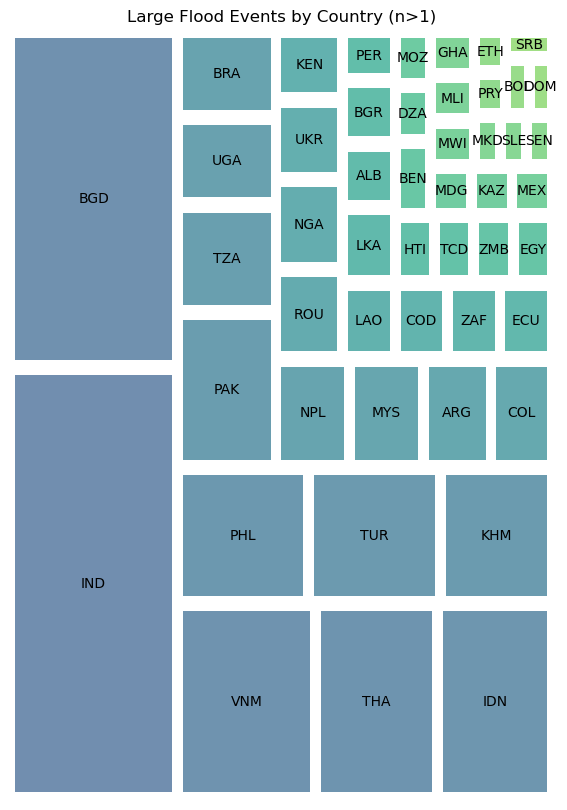

In [50]:
# Plot country counts using squarify plot
counts = histogram_df['ISO3'].value_counts()
# Only interested in countries that appear at least twice
counts = counts[counts > 1]
cmap = cm.get_cmap('viridis')               # try 'OrRd', 'viridis', 'tab20', etc.
normed = np.linspace(0.3, 0.8, len(counts))  # 0.3–0.8 to avoid extremes
colors = [cmap(x) for x in normed]
counts = counts.sort_values(ascending=False)
plt.figure(figsize=(7, 10))
squarify.plot(sizes=counts.values,
              label=counts.index,
              color=colors,
              pad=True,
              alpha=0.7)
plt.title("Large Flood Events by Country (n>1)")
plt.axis('off')